### Analyze network results, when trained at good params, makes most key plots in writeup

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
# funcs stolen from nyu deep learning course
from sequential_tasks import pad_sequences, to_categorical
import os
import random

In [2]:
on_cluster = True
# set up folder to save results
if on_cluster:
    to_save_folder = '/scratch/gpfs/erussek/RNN_project/train_on_sim_results_oct'
else:
    to_save_folder = '/Users/evanrussek/Dropbox/Griffiths_Lab_Stuff/Code/RNNs/train_on_sim_results'

train_setting = 0
job_idx = 0
loss_file_name = 'loss_res_train_setting_{}_job_{}.npy'.format(train_setting,job_idx)
loss_full_file_name = os.path.join(to_save_folder, loss_file_name)



In [7]:
def load_this_res(on_cluster, train_setting, job_idx):
    
    #if train_setting == 2:
    #    print(job_idx)
    
    on_cluster = True
    # set up folder to save results
    if on_cluster:
        to_save_folder = '/scratch/gpfs/erussek/RNN_project/train_on_sim_results_oct'
    else:
        to_save_folder = '/Users/evanrussek/Dropbox/Griffiths_Lab_Stuff/Code/RNNs/train_on_sim_results'

    loss_file_name = 'loss_res_train_setting_{}_job_{}.npy'.format(train_setting,job_idx)
    loss_full_file_name = os.path.join(to_save_folder, loss_file_name)

   # print(loss_file_name)
    with open(loss_full_file_name, 'rb') as f:
        loss_res = np.load(f)
        train_num = np.load(f)
        r_sim_by_n_back = np.load(f)
        r_human_by_n_back = np.load(f)
    
    return loss_res,train_num,r_sim_by_n_back,r_human_by_n_back


def load_all_res(train_setting):
    n_total_train_seq = 1.5e6
    
    all_jobs = np.arange(50)
    if train_setting < 2:
        bad_jobs = []
    else:
        bad_jobs = [1,10]
    
    good_jobs = np.delete(all_jobs,bad_jobs);
    
    batch_size=32
    test_int = 100
    n_train_examples = int(np.floor(n_total_train_seq/batch_size/test_int))
    n_jobs = len(good_jobs)
    n_nback=19
    
    if train_setting == 2:
        n_nback=1

    all_loss_res = np.zeros((n_jobs,n_train_examples))
    all_train_num = np.zeros((n_jobs,n_train_examples))
    all_r_sim_by_n_back = np.zeros((n_jobs,n_nback))
    all_r_human_by_n_back = np.zeros((n_jobs,n_nback))

    on_cluster = True
    for job_idx in range(len(good_jobs)):
        this_job = good_jobs[job_idx]
        loss_res,train_num,r_sim_by_n_back,r_human_by_n_back = load_this_res(on_cluster, train_setting, this_job)
        all_loss_res[job_idx, :] = loss_res
        all_train_num[job_idx, :] = train_num
        all_r_sim_by_n_back[job_idx, :] = r_sim_by_n_back
        all_r_human_by_n_back[job_idx, :] = r_human_by_n_back
        
    return all_loss_res,all_train_num,all_r_sim_by_n_back,all_r_human_by_n_back

In [8]:
all_loss_res_fc,all_train_num_fc,all_r_sim_by_n_back_fc,all_r_human_by_n_back_fc=load_all_res(0)
all_loss_res_f,all_train_num_f,all_r_sim_by_n_back_f,all_r_human_by_n_back_f=load_all_res(1)
all_loss_res_c,all_train_num_c,all_r_sim_by_n_back_c,all_r_human_by_n_back_c=load_all_res(2)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/gpfs/erussek/RNN_project/train_on_sim_results_oct/loss_res_train_setting_1_job_0.npy'

Text(0, 0.5, 'Mean Squared Error (Held-Out Data)')

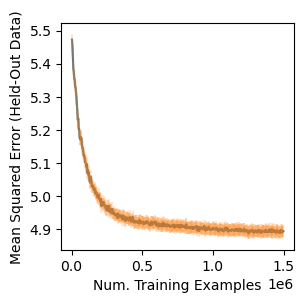

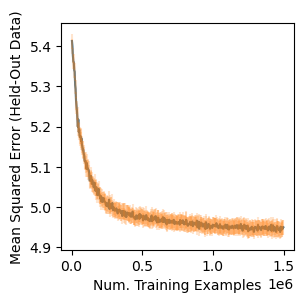

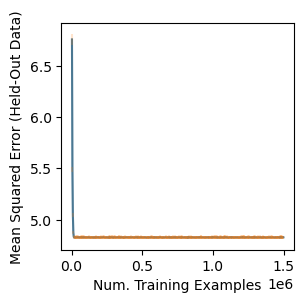

In [9]:
correct_train_num = (all_train_num_fc[0,:]/200)*32

fig,ax = plt.subplots(1,figsize=(3,3),dpi=100)
ax.plot(correct_train_num,np.mean(all_loss_res_fc,0))
ax.errorbar(correct_train_num,np.mean(all_loss_res_fc,0), np.std(all_loss_res_fc,0)/np.sqrt(50), alpha=.2)
ax.set_xlabel('Num. Training Examples')
ax.set_ylabel('Mean Squared Error (Held-Out Data)')

fig,ax = plt.subplots(1,figsize=(3,3),dpi=100)
ax.plot(correct_train_num,np.mean(all_loss_res_f,0))
ax.errorbar(correct_train_num,np.mean(all_loss_res_f,0), np.std(all_loss_res_f,0)/np.sqrt(50), alpha=.2)
ax.set_xlabel('Num. Training Examples')
ax.set_ylabel('Mean Squared Error (Held-Out Data)')

fig,ax = plt.subplots(1,figsize=(3,3),dpi=100)
ax.plot(correct_train_num,np.mean(all_loss_res_c,0))
ax.errorbar(correct_train_num,np.mean(all_loss_res_c,0), np.std(all_loss_res_c,0)/np.sqrt(50), alpha=.2)
ax.set_xlabel('Num. Training Examples')
ax.set_ylabel('Mean Squared Error (Held-Out Data)')

Simulated Performance: 
choice and fix [0.58202759 0.41193118 0.39323121 0.36393485 0.33340453 0.30589545
 0.28763174 0.27496302 0.26808596 0.26407935 0.26078087 0.25812554
 0.25536509 0.25410084 0.25354925 0.24840087 0.24671168 0.24761469
 0.24399858]
fix [0.40566031 0.38625562 0.35663081 0.32565803 0.2980963  0.27996119
 0.26771683 0.26073252 0.25732459 0.25442381 0.25239053 0.2494893
 0.24826057 0.24891743 0.24331771 0.24166138 0.2428627  0.2389227
 0.23470949]
choice [0.48539386]
Human Performance: 
choice and fix [0.45527273 0.2015053  0.17960394 0.16592264 0.1579011  0.1356547
 0.11453873 0.09447911 0.07287641 0.05718605 0.04471005 0.03498309
 0.03221959 0.03410579 0.03614507 0.04408333 0.0557166  0.06202155
 0.06347114]
fix [0.20549964 0.18243738 0.16732054 0.15817884 0.13646176 0.11573451
 0.09450757 0.07364293 0.05890682 0.04581953 0.03717806 0.03559673
 0.03763194 0.0387583  0.04755882 0.05917578 0.06501577 0.06659053
 0.06274409]
choice [0.47190077]


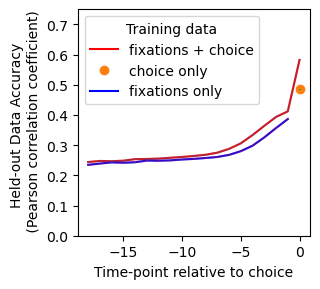

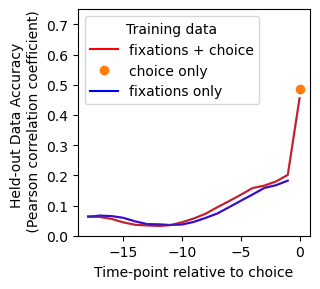

In [10]:
fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=100)
these_tps = np.arange(-18,1,1)
ax.plot(these_tps,np.flip(np.mean(all_r_sim_by_n_back_fc,0)), 'r-', label='fixations + choice')
ax.errorbar(these_tps,np.flip(np.mean(all_r_sim_by_n_back_fc,0)), np.flip(np.std(all_r_sim_by_n_back_fc,0)/np.sqrt(50)), alpha=.25)
ax.plot(0,np.mean(all_r_sim_by_n_back_c), 'o', label='choice only')
ax.errorbar(0,np.mean(all_r_sim_by_n_back_c), np.std(all_r_sim_by_n_back_c)/np.sqrt(50))
ax.plot(np.arange(-18,0,1),np.flip(np.mean(all_r_sim_by_n_back_f[:,1:],0)), 'b-', label='fixations only')
ax.errorbar(np.arange(-18,0,1),np.flip(np.mean(all_r_sim_by_n_back_f[:,1:],0)), np.flip(np.std(all_r_sim_by_n_back_f[:,1:],0)/np.sqrt(50)), alpha=.25)
ax.legend(title='Training data')
ax.set_xlabel('Time-point relative to choice')
ax.set_ylabel('Held-out Data Accuracy \n (Pearson correlation coefficient)')
ax.set_ylim(0,.75)

ax.set_title('')


fig,ax = plt.subplots(1,figsize=(3,3),dpi=100)
ax.plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc,0)), 'r-', label='fixations + choice')
ax.errorbar(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc,0)), np.flip(np.std(all_r_human_by_n_back_fc,0)/np.sqrt(50)), alpha=.25)
ax.plot(0,np.mean(all_r_sim_by_n_back_c), 'o', label = 'choice only')
ax.errorbar(0,np.mean(all_r_human_by_n_back_c), np.std(all_r_human_by_n_back_c)/np.sqrt(50))

ax.plot(np.arange(-18,0,1),np.flip(np.mean(all_r_human_by_n_back_f[:,1:],0)), 'b-', label='fixations only')
ax.errorbar(np.arange(-18,0,1),np.flip(np.mean(all_r_human_by_n_back_f[:,1:],0)), np.flip(np.std(all_r_human_by_n_back_f[:,1:],0)/np.sqrt(50)), alpha=.25)
ax.set_ylabel('Held-out Data Accuracy \n (Pearson correlation coefficient)')
ax.set_xlabel('Time-point relative to choice')
ax.legend(title='Training data')
ax.set_title('')
ax.set_ylim(0,.75)
#np.mean(all_r_sim_by_n_back_c)
#np.mean(all_r_human_by_n_back_c)
print('Simulated Performance: ')
print('choice and fix {}'.format(np.mean(all_r_sim_by_n_back_fc,0)))
print('fix {}'.format(np.mean(all_r_sim_by_n_back_f,0)))
print('choice {}'.format(np.mean(all_r_sim_by_n_back_c,0)))

print('Human Performance: ')
print('choice and fix {}'.format(np.mean(all_r_human_by_n_back_fc,0)))
print('fix {}'.format(np.mean(all_r_human_by_n_back_f,0)))
print('choice {}'.format(np.mean(all_r_human_by_n_back_c,0)))

In [7]:
### load res from optimal train time-points... 
def load_this_res_pt(train_setting, job_idx):
    
    #if train_setting == 2:
    #    print(job_idx)
    
    on_cluster = True
    if on_cluster:
        to_save_folder = '/scratch/gpfs/erussek/RNN_project/train_on_sim_and_human_results_optimal'
    else:
        to_save_folder = '/Users/evanrussek/Dropbox/Griffiths_Lab_Stuff/Code/RNNs/train_on_sim_and_human_results_optimal'
    # save loss curve
    loss_file_name = 'loss_res_train_setting_{}_job_{}.npy'.format(train_setting,job_idx)
    loss_full_file_name = os.path.join(to_save_folder, loss_file_name)

   # print(loss_file_name)
    with open(loss_full_file_name, 'rb') as f:
        sim_loss_res = np.load(f)
        human_loss_res = np.load(f)
        train_num = np.load(f)
        r_sim_by_n_back = np.load(f)
        r_human_by_n_back = np.load(f)
    
    return sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back


def load_all_res_pt(train_setting):
    
    # just load one to get the size
    job_idx=0
    sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back=load_this_res_pt(train_setting, job_idx)

    all_jobs = np.arange(50)
    if train_setting < 2:
        bad_jobs = []
    else:
        bad_jobs = [1,10]
    
    good_jobs = np.delete(all_jobs,bad_jobs);
    

    n_train_examples = len(sim_loss_res)
    n_jobs = len(good_jobs)
    n_nback=19
    
    if train_setting == 2:
        n_nback=1

    all_sim_loss_res = np.zeros((n_jobs,n_train_examples))
    all_human_loss_res = np.zeros((n_jobs,n_train_examples))
    all_train_num = np.zeros((n_jobs,n_train_examples))
    all_r_sim_by_n_back = np.zeros((n_jobs,n_nback))
    all_r_human_by_n_back = np.zeros((n_jobs,n_nback))

    on_cluster = True
    for job_idx in range(len(good_jobs)):
        this_job = good_jobs[job_idx]
        sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back=load_this_res_pt(train_setting, this_job)
        all_sim_loss_res[job_idx, :] = sim_loss_res
        all_human_loss_res[job_idx, :] = human_loss_res
        all_train_num[job_idx, :] = train_num
        all_r_sim_by_n_back[job_idx, :] = r_sim_by_n_back
        all_r_human_by_n_back[job_idx, :] = r_human_by_n_back
        
    return all_sim_loss_res,all_human_loss_res,all_train_num,all_r_sim_by_n_back,all_r_human_by_n_back

In [8]:
### load res from optimal train time-points... 
def load_this_res_no_pt(train_setting, job_idx):
    
    #if train_setting == 2:
    #    print(job_idx)
    
    on_cluster=True
    if on_cluster:
        to_save_folder = '/scratch/gpfs/erussek/RNN_project/train_on_sim_and_human_results_optimal_no_pt'
    else:
        to_save_folder = '/Users/evanrussek/Dropbox/Griffiths_Lab_Stuff/Code/RNNs/train_on_sim_and_human_results_optimal_no_pt'
    # save loss curve
    loss_file_name = 'loss_res_train_setting_{}_job_{}.npy'.format(train_setting,job_idx)
    loss_full_file_name = os.path.join(to_save_folder, loss_file_name)

   # print(loss_file_name)
    with open(loss_full_file_name, 'rb') as f:
        sim_loss_res = np.load(f)
        human_loss_res = np.load(f)
        train_num = np.load(f)
        r_sim_by_n_back = np.load(f)
        r_human_by_n_back = np.load(f)
    
    return sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back


def load_all_res_no_pt(train_setting):
    
    # just load one to get the size
    job_idx=0
    sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back=load_this_res_no_pt(train_setting, job_idx)

    all_jobs = np.arange(50)
    if train_setting < 2:
        bad_jobs = []
    else:
        bad_jobs = [1,10]
    
    good_jobs = np.delete(all_jobs,bad_jobs);
    

    n_train_examples = len(sim_loss_res)
    n_jobs = len(good_jobs)
    n_nback=19
    
    if train_setting == 2:
        n_nback=1

    all_sim_loss_res = np.zeros((n_jobs,n_train_examples))
    all_human_loss_res = np.zeros((n_jobs,n_train_examples))
    all_train_num = np.zeros((n_jobs,n_train_examples))
    all_r_sim_by_n_back = np.zeros((n_jobs,n_nback))
    all_r_human_by_n_back = np.zeros((n_jobs,n_nback))

    on_cluster = True
    for job_idx in range(len(good_jobs)):
        this_job = good_jobs[job_idx]
        sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back=load_this_res_no_pt(train_setting, this_job)
        all_sim_loss_res[job_idx, :] = sim_loss_res
        all_human_loss_res[job_idx, :] = human_loss_res
        all_train_num[job_idx, :] = train_num
        all_r_sim_by_n_back[job_idx, :] = r_sim_by_n_back
        all_r_human_by_n_back[job_idx, :] = r_human_by_n_back
        
    return all_sim_loss_res,all_human_loss_res,all_train_num,all_r_sim_by_n_back,all_r_human_by_n_back

Train Setting: 0
Train Setting: 1


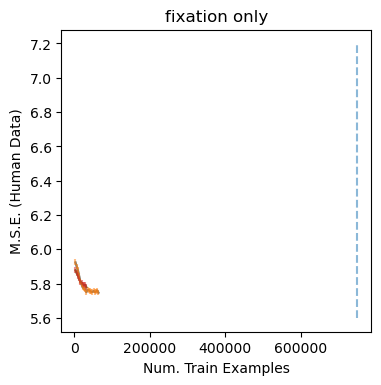

In [9]:
#n_pretrain = np.round(np.linspace(0,1,5)*1.5e6).astype(int);
#these_colors = ['b', 'g', 'r', 'c', 'm']

fig,ax = plt.subplots(1,figsize=(4,4),dpi=100)

titles = ['fixation + choice', 'fixation only', 'choice only']

pretrain_vals = [7.5e5, 7.5e5, 0]

for train_setting in range(2):
    print('Train Setting: {}'.format(train_setting))

    all_sim_loss_res_fc_pt,all_human_loss_res_fc_pt,all_train_num_fc_pt,all_r_sim_by_n_back_fc_pt,all_r_human_by_n_back_fc_pt=load_all_res_no_pt(train_setting)


    ax.plot(all_train_num_fc_pt[1,:],np.mean(all_human_loss_res_fc_pt,0))
    ax.errorbar(all_train_num_fc_pt[1,:],np.mean(all_human_loss_res_fc_pt,0), np.std(all_human_loss_res_fc_pt,0)/np.sqrt(50), alpha=.5)
    ax.vlines(pretrain_vals[train_setting], 5.6,7.2, linestyles='dashed',alpha=.3)

    ax.set_ylabel('M.S.E. (Human Data)')
    ax.set_xlabel('Num. Train Examples')
    ax.set_title(titles[train_setting])
    
    # did this wrong... 

In [10]:
all_sim_loss_res_fc_pt,all_human_loss_res_fc_pt,all_train_num_fc_pt,all_r_sim_by_n_back_fc_pt,all_r_human_by_n_back_fc_pt=load_all_res_pt(0)
all_sim_loss_res_f_pt,all_human_loss_res_f_pt,all_train_num_f_pt,all_r_sim_by_n_back_fc_pt,all_r_human_by_n_back_f_pt=load_all_res_pt(1)
all_sim_loss_res_c_t,all_human_loss_res_c_pt,all_train_num_c_pt,all_r_sim_by_n_back_c_pt,all_r_human_by_n_back_c_pt=load_all_res_pt(2)

all_sim_loss_res_fc_no_pt,all_human_loss_res_fc_no_pt,all_train_num_fc_no_pt,all_r_sim_by_n_back_fc_no_pt,all_r_human_by_n_back_fc_no_pt=load_all_res_no_pt(0)
all_sim_loss_res_f_no_pt,all_human_loss_res_fc_no_pt,all_train_num_f_no_pt,all_r_sim_by_n_back_f_no_pt,all_r_human_by_n_back_f_no_pt=load_all_res_no_pt(1)


[0.47792105 0.27405655 0.24718985 0.22941875 0.21478972 0.18711694
 0.15760941 0.13636433 0.11121579 0.09210152 0.07738822 0.06929726
 0.06779497 0.07180757 0.07498076 0.08554083 0.09654359 0.09933582
 0.09827517]
[0.47792105 0.27405655 0.24718985 0.22941875 0.21478972 0.18711694
 0.15760941 0.13636433 0.11121579 0.09210152 0.07738822 0.06929726
 0.06779497 0.07180757 0.07498076 0.08554083 0.09654359 0.09933582
 0.09827517]
[0.45511101 0.20087412 0.17886652 0.16528917 0.15746166 0.1353263
 0.11407481 0.09406825 0.07261967 0.05709438 0.04478005 0.03516337
 0.03237005 0.03406618 0.03643726 0.04437362 0.05599156 0.06180819
 0.06317985]
[0.46778624 0.22851125 0.20193205 0.18279302 0.17201835 0.14905218
 0.11484441 0.0920869  0.06515369 0.0425963  0.02496124 0.01477665
 0.01324072 0.02133089 0.03013866 0.0419793  0.05421536 0.05760439
 0.06202538]


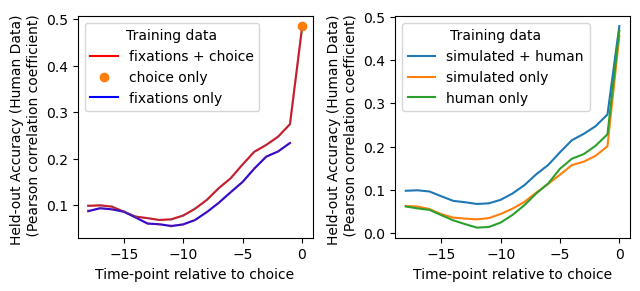

In [11]:
fig,ax = plt.subplots(1,2,figsize=(6.5,3),dpi=100)
plt.gcf().subplots_adjust(bottom=0.15)

ax[0].plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc_pt,0)), 'r-', label='fixations + choice')
ax[0].errorbar(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc_pt,0)), np.flip(np.std(all_r_human_by_n_back_fc_pt,0)/np.sqrt(50)), alpha=.25)
ax[0].plot(0,np.mean(all_r_sim_by_n_back_c_pt), 'o', label = 'choice only')
ax[0].errorbar(0,np.mean(all_r_human_by_n_back_c_pt), np.std(all_r_human_by_n_back_c_pt)/np.sqrt(50))

ax[0].plot(np.arange(-18,0,1),np.flip(np.mean(all_r_human_by_n_back_f_pt[:,1:],0)), 'b-', label='fixations only')
ax[0].errorbar(np.arange(-18,0,1),np.flip(np.mean(all_r_human_by_n_back_f_pt[:,1:],0)), np.flip(np.std(all_r_human_by_n_back_f_pt[:,1:],0)/np.sqrt(50)), alpha=.25)
ax[0].set_ylabel('Held-out Accuracy (Human Data) \n (Pearson correlation coefficient)')
ax[0].legend(title='Training data')
ax[0].set_xlabel('Time-point relative to choice')

ax[1].plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc_pt,0)), label='simulated + human')
ax[1].plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc,0)),  label='simulated only')
ax[1].plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc_no_pt,0)), label='human only')
ax[1].legend(title='Training data')
ax[1].set_xlabel('Time-point relative to choice')
ax[1].set_ylabel('Held-out Accuracy (Human Data) \n (Pearson correlation coefficient)')
plt.tight_layout()


print(np.mean(all_r_human_by_n_back_fc_pt,0))
np.mean(all_r_human_by_n_back_fc_pt,0)


print(np.mean(all_r_human_by_n_back_fc_pt,0))
print(np.mean(all_r_human_by_n_back_fc,0))
print(np.mean(all_r_human_by_n_back_fc_no_pt,0))

array([0.47792105, 0.27405655, 0.24718985, 0.22941875, 0.21478972,
       0.18711694, 0.15760941, 0.13636433, 0.11121579, 0.09210152,
       0.07738822, 0.06929726, 0.06779497, 0.07180757, 0.07498076,
       0.08554083, 0.09654359, 0.09933582, 0.09827517])

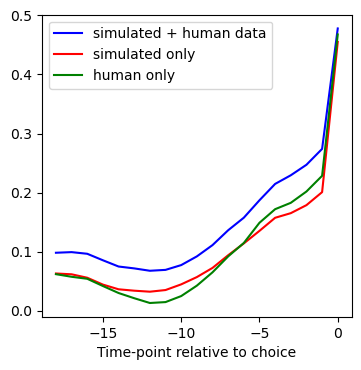

In [12]:
fig,ax = plt.subplots(1,figsize=(4,4),dpi=100)

ax.plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc_pt,0)), 'b-', label='simulated + human data')
ax.plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc,0)), 'r-', label='simulated only')
ax.plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc_no_pt,0)), 'g-', label='human only')
ax.legend()
ax.set_xlabel('Time-point relative to choice')
np.mean(all_r_human_by_n_back_fc_pt,0)

# ax[1].plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_f_pt,0)), 'b-', label='simulated + human data')
# ax[1].plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_f,0)), 'r-', label='stimulated only')
# ax[1].plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_f_no_pt,0)), 'g-', label='human only')
# ax[1].legend()
#ax[1].set_xlabel('Time-point relative to choice')
# np.mean(all_r_human_by_n_back_fc_pt,0)

array([0.47792105, 0.27405655, 0.24718985, 0.22941875, 0.21478972,
       0.18711694, 0.15760941, 0.13636433, 0.11121579, 0.09210152,
       0.07738822, 0.06929726, 0.06779497, 0.07180757, 0.07498076,
       0.08554083, 0.09654359, 0.09933582, 0.09827517])

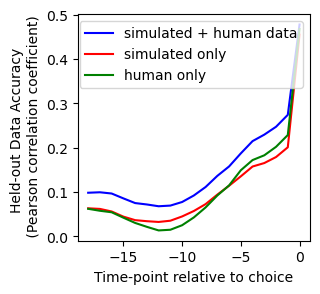

In [13]:
fig,ax = plt.subplots(1,figsize=(3,3),dpi=100)
ax.plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc_pt,0)), 'b-', label='simulated + human data')
ax.plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc,0)), 'r-', label='simulated only')
ax.plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc_no_pt,0)), 'g-', label='human only')
ax.legend()
ax.set_ylabel('Held-out Data Accuracy \n (Pearson correlation coefficient)')
ax.set_xlabel('Time-point relative to choice')
np.mean(all_r_human_by_n_back_fc_pt,0)